In [1]:
import numpy as np
import numpy.linalg as la
import numpy.random as rn
import matplotlib.pyplot as plt

## Subgradient Method

In [2]:
def subgradient(x, A, b, t, lam, c=1e-7):
    eta = c/np.sqrt(t+1)
    
    # Find subgradient
    grad = np.dot(np.transpose(A), np.matmul(A,x) - b) + lam*np.sign(x)
    
    # update
    x = x - eta*grad
    
    return x

## ISTA Method

In [3]:
def prox(x, eta, lam):
    u = np.zeros(x.shape[0])
    
    for i in range(x.shape[0]):
        u[i] = np.sign(x[i])*np.max(np.abs(x[i]) - eta*lam)
    
    return u

def ista(x, A, b, t, lam):
    eta = 1e-8
    
    grad = np.dot(np.transpose(A), np.matmul(A, x) - b)
    y = x - eta*grad
    
    x = prox(y, eta, lam)
    
    return x

## FISTA Method 

In [18]:
def root(eta, gam, alfa):
    a = 1
    b = (eta**2)*(gam - a)
    c = -eta**2*gam
    
    theta = (-b + np.sqrt(b**2 - 4*a*c))/2
    return theta

def fista(x, v, gam, A, b, t, lam):
    eta = 1e-8
    alfa = 10
    
    # find theta
    theta = root(eta, gam, alfa)
    
    # update
    y = x + (theta*gam)/(gam + alfa*theta)*(v - x)
    
    grad = np.dot(np.transpose(A), np.matmul(A, y) - b)
    
    xprev = x
    x = prox(y - eta*grad, eta, lam)
    v = x + 1/theta*(x - xprev)
    
    gam = theta**2/eta
    
    return x, v, gam

##  Set up

In [5]:
def descent(update, A, b, reg, T=int(1e4)):
    x = np.zeros(A.shape[1])
    error = []
    obj = []
    
    for t in range(T):
        x = update(x, A, b, t, reg)
        
        # record error
        if(t % 1 == 0) or (t == T - 1):
            error.append(la.norm(np.dot(A, x) - b))
            
            assert not np.isnan(error[-1])
    
    return x, error

In [14]:
def descent2(update, A, b, reg, gam, T=int(1e4)):
    x = np.zeros(A.shape[1])
    v = x
    error = []
    
    for t in range(T):
        x, v, gam = update(x, v, gam, A, b, t, reg)
        
        # record error
        if(t % 1 == 0) or (t == T - 1):
            error.append(la.norm(np.dot(A, x) - b))
            
            assert not np.isnan(error[-1])
    
    return x, error

## Run Cases

In [7]:
rn.seed([42])
T = int(1e4)
rows = 3000
cols = 1500

A = rn.rand(rows, cols)

x_true = rn.rand(cols)

b = np.matmul(A,x_true)

In [8]:
x_sg, error_sg = descent(subgradient, A, b, reg=1., T=T)

In [12]:
x_is, error_is = descent(ista, A, b, reg=4., T=T)

In [20]:
x_fs, error_fs = descent2(fista, A, b, reg=4., gam=0.5, T=T)

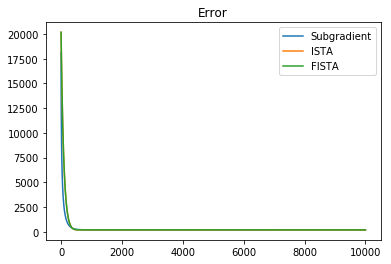

In [25]:
%matplotlib inline
plt.plot(error_sg, label="Subgradient")
plt.plot(error_is, label="ISTA")
plt.plot(error_fs, label="FISTA")
plt.title('Error')
plt.legend()